In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import jedi

In [3]:
#reading file
data = pd.read_csv("google-data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [4]:
df = data.copy()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [5]:
df.drop(['Open','High','Low', 'Adj Close','Volume'], axis=1, inplace = True)
df

,Date,Close
0,2013-01-02,359.288177
1,2013-01-03,359.496826
2,2013-01-04,366.600616
3,2013-01-07,365.001007
4,2013-01-08,364.280701
...,...,...
1254,2017-12-22,1060.119995
1255,2017-12-26,1056.739990
1256,2017-12-27,1049.369995
1257,2017-12-28,1048.140015


In [6]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [7]:
df.count()

Date     1259
Close    1259
dtype: int64

In [8]:
df.dtypes

Date      object
Close    float64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Date'].min(), df['Date'].max()

(Timestamp('2013-01-02 00:00:00'), Timestamp('2017-12-29 00:00:00'))

In [11]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [12]:
#groupby index date
df = df.groupby('Date')['Close'].sum().reset_index()

In [13]:
df = df.set_index('Date')

In [14]:
df['Close']

Date
2013-01-02     359.288177
2013-01-03     359.496826
2013-01-04     366.600616
2013-01-07     365.001007
2013-01-08     364.280701
                 ...     
2017-12-22    1060.119995
2017-12-26    1056.739990
2017-12-27    1049.369995
2017-12-28    1048.140015
2017-12-29    1046.400024
Name: Close, Length: 1259, dtype: float64

In [15]:
df

,Close
Date,
2013-01-02,359.288177
2013-01-03,359.496826
2013-01-04,366.600616
2013-01-07,365.001007
2013-01-08,364.280701
...,...
2017-12-22,1060.119995
2017-12-26,1056.739990
2017-12-27,1049.369995


In [16]:
y = df['Close'].resample('MS').mean()
y

Date
2013-01-01     364.720937
2013-02-01     390.433504
2013-03-01     406.348845
2013-04-01     395.629537
2013-05-01     435.486666
2013-06-01     435.794327
2013-07-01     447.796380
2013-08-01     434.694547
2013-09-01     439.787605
2013-10-01     466.314465
2013-11-01     512.096556
2013-12-01     538.671933
2014-01-01     564.515747
2014-02-01     591.242689
2014-03-01     587.526344
2014-04-01     537.075439
2014-05-01     531.132878
2014-06-01     555.376721
2014-07-01     580.822008
2014-08-01     570.463954
2014-09-01     578.707002
2014-10-01     544.038582
2014-11-01     540.008632
2014-12-01     521.757912
2015-01-01     509.613568
2015-02-01     535.047835
2015-03-01     556.653079
2015-04-01     538.112383
2015-05-01     535.238998
2015-06-01     532.915913
2015-07-01     590.093636
2015-08-01     636.838097
2015-09-01     617.934756
2015-10-01     663.592718
2015-11-01     735.388498
2015-12-01     755.354548
2016-01-01     718.495792
2016-02-01     702.689001
2016-03

In [17]:
df

,Close
Date,
2013-01-02,359.288177
2013-01-03,359.496826
2013-01-04,366.600616
2013-01-07,365.001007
2013-01-08,364.280701
...,...
2017-12-22,1060.119995
2017-12-26,1056.739990
2017-12-27,1049.369995


In [18]:
df = df['2017':].reset_index().sort_values('Date',ascending=True)

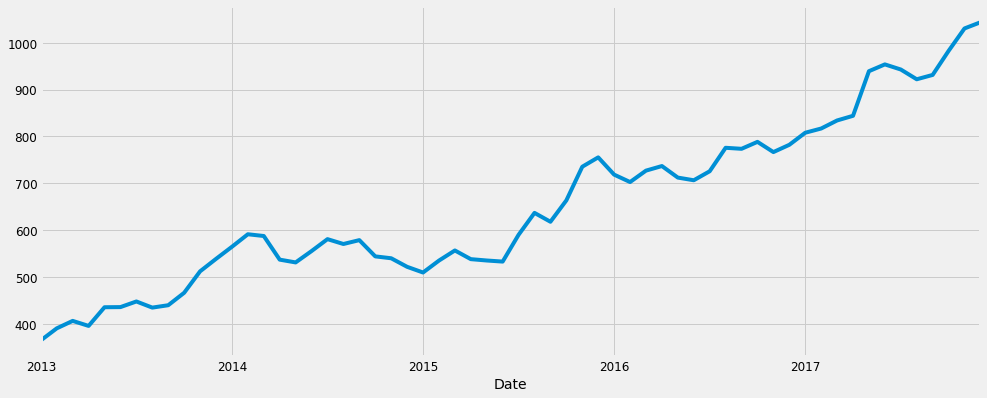

In [19]:
y.plot(figsize=(15, 6))
plt.show()

In [20]:
#craeating prophet model
from fbprophet import Prophet
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

df

,ds,y
0,2017-01-03,786.140015
1,2017-01-04,786.900024
2,2017-01-05,794.020020
3,2017-01-06,806.150024
4,2017-01-09,806.650024
...,...,...
246,2017-12-22,1060.119995
247,2017-12-26,1056.739990
248,2017-12-27,1049.369995
249,2017-12-28,1048.140015


In [21]:
model = Prophet(interval_width=0.95)
model.fit(df)
data_forecast = model.make_future_dataframe(periods=100, freq='MS')
data_forecast = model.predict(data_forecast)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

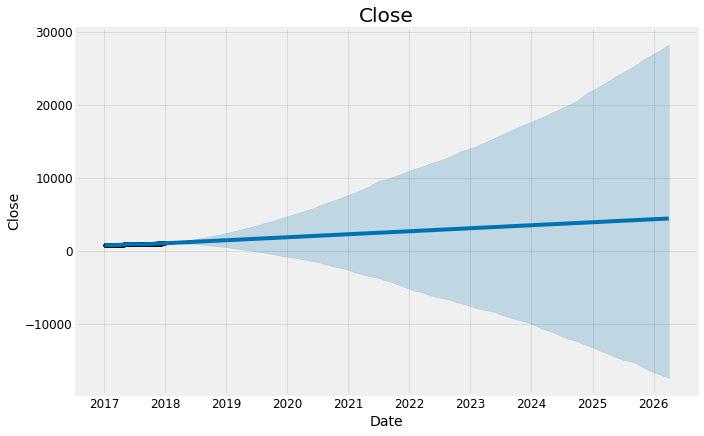

In [22]:
#plotting furniture forecast
plt.figure(figsize=(18, 6))
model.plot(data_forecast, xlabel = 'Date', ylabel = 'Close')
plt.title('Close');

In [23]:
data_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-03,798.744185,768.189276,834.781515,798.744185,798.744185,2.722708,2.722708,2.722708,2.722708,2.722708,2.722708,0.0,0.0,0.0,801.466893
1,2017-01-04,799.140650,771.265952,831.610887,799.140650,799.140650,3.336028,3.336028,3.336028,3.336028,3.336028,3.336028,0.0,0.0,0.0,802.476678
2,2017-01-05,799.537116,771.339806,832.433547,799.537116,799.537116,2.004400,2.004400,2.004400,2.004400,2.004400,2.004400,0.0,0.0,0.0,801.541516
3,2017-01-06,799.933581,773.950056,836.793053,799.933581,799.933581,4.195406,4.195406,4.195406,4.195406,4.195406,4.195406,0.0,0.0,0.0,804.128987
4,2017-01-09,801.122977,772.106788,834.104640,801.122977,801.122977,1.989483,1.989483,1.989483,1.989483,1.989483,1.989483,0.0,0.0,0.0,803.112460


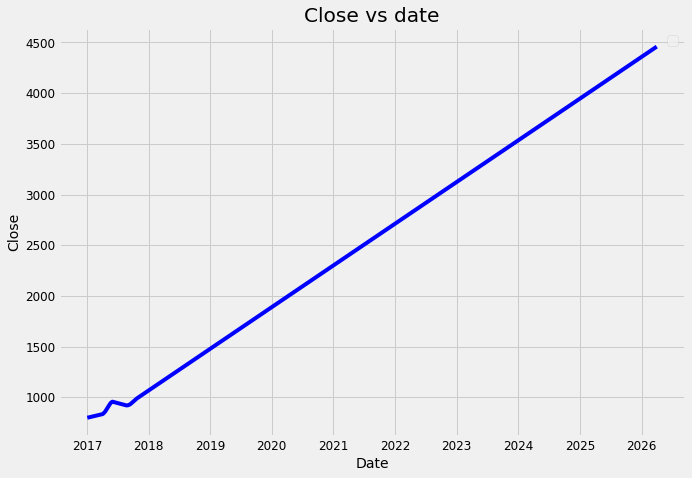

In [24]:
#trend and forecast visualisation
plt.figure(figsize=(10, 7))
plt.plot(data_forecast['ds'], data_forecast['trend'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Close')
plt.title('Close vs date');

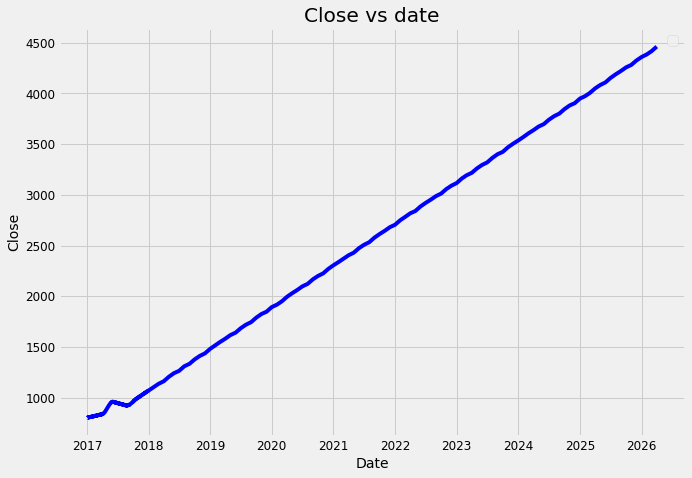

In [25]:
plt.figure(figsize=(10, 7))
plt.plot(data_forecast['ds'], data_forecast['yhat'], 'b-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Close')
plt.title('Close vs date');

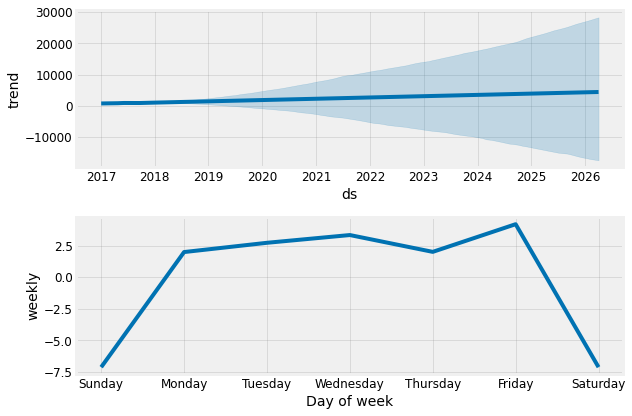

In [26]:
#plot components of time-series
model.plot_components(data_forecast);

In [62]:
import itertools
import numpy as np
import pandas as pd
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

param_grid = {
    'changepoint_prior_scale':[0.001,0.01, 0.1,0.5],
    'seasonality_prior_scale':[0.01,0.1,1.0,10.0]
}

all_params = [dict(zip(param_grid.keys(),v)) for v in itertools.product(*param_grid.values())
]

rmses = []

for params in all_params:
   m = Prophet(**params).fit(df)
   df_cv = cross_validation(m, horizon = '30 days' , parallel = "processes")
   df_p = performance_metrics(df_cv, rolling_window = 1)
   rmses.append(df_p['rmse'].values[0])

tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 17 forecasts with cutoffs between 2017-04-03 00:00:00 and 2017-11-29 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1ff8fbed90>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 17 forecasts with cutoffs between 2017-04-03 00:00:00 and 2017-11-29 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f1ff8fb5050>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophe

    changepoint_prior_scale  seasonality_prior_scale       rmse
0                     0.001                     0.01  44.319994
1                     0.001                     0.10  44.547247
2                     0.001                     1.00  44.489760
3                     0.001                    10.00  44.498213
4                     0.010                     0.01  53.862784
5                     0.010                     0.10  52.705587
6                     0.010                     1.00  55.138108
7                     0.010                    10.00  54.894278
8                     0.100                     0.01  43.513263
9                     0.100                     0.10  43.491022
10                    0.100                     1.00  43.506578
11                    0.100                    10.00  43.460698
12                    0.500                     0.01  44.186626
13                    0.500                     0.10  44.195727
14                    0.500             

In [63]:
data_forecast = model.make_future_dataframe(periods=100, freq='MS')
data_forecast = model.predict(data_forecast)

In [64]:
data_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-03,798.744185,772.529460,832.722427,798.744185,798.744185,2.722708,2.722708,2.722708,2.722708,2.722708,2.722708,0.0,0.0,0.0,801.466893
1,2017-01-04,799.140650,773.120061,835.933164,799.140650,799.140650,3.336028,3.336028,3.336028,3.336028,3.336028,3.336028,0.0,0.0,0.0,802.476678
2,2017-01-05,799.537116,771.655164,835.325588,799.537116,799.537116,2.004400,2.004400,2.004400,2.004400,2.004400,2.004400,0.0,0.0,0.0,801.541516
3,2017-01-06,799.933581,772.911189,833.608425,799.933581,799.933581,4.195406,4.195406,4.195406,4.195406,4.195406,4.195406,0.0,0.0,0.0,804.128987
4,2017-01-09,801.122977,772.092364,835.402687,801.122977,801.122977,1.989483,1.989483,1.989483,1.989483,1.989483,1.989483,0.0,0.0,0.0,803.112460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2025-12-01,4322.554533,-14853.685082,24005.534508,-14847.452301,23993.419811,1.989483,1.989483,1.989483,1.989483,1.989483,1.989483,0.0,0.0,0.0,4324.544015
347,2026-01-01,4357.462009,-15163.927321,24435.092458,-15151.218556,24423.298938,2.004400,2.004400,2.004400,2.004400,2.004400,2.004400,0.0,0.0,0.0,4359.466409
348,2026-02-01,4392.369485,-15482.414439,24807.138683,-15464.391560,24802.633769,-7.124012,-7.124012,-7.124012,-7.124012,-7.124012,-7.124012,0.0,0.0,0.0,4385.245472
349,2026-03-01,4423.898818,-15733.929079,25084.115387,-15747.520503,25078.368004,-7.124012,-7.124012,-7.124012,-7.124012,-7.124012,-7.124012,0.0,0.0,0.0,4416.774806
